In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import viz
from scipy import stats
from math import sqrt

In [227]:
plt.rc('figure', figsize=(16,9))

### 1. How likely is it that you roll doubles when rolling two dice?

1. Assuming two dices are six sides and fair

In [24]:
# Assume the dices are six sides and fair. A n * 2 matrix could be created to simulate the situlation

n_trials = nrows = 2_000
n_dice = ncols = 2

rolls = np.random.choice(a = [1,2,3,4,5,6], 
                         size = (n_trials, n_dice)
                        )
rolls

array([[4, 3],
       [2, 4],
       [2, 5],
       ...,
       [1, 4],
       [5, 5],
       [4, 6]])

In [20]:
boolean_roll_doubles = [rolls[i][0] == rolls[i][1] for i in range(0, nrows)]
pd.Series(boolean_roll_doubles).mean()

0.167

In [12]:
# To simulate rolling two dice

n_trials = 1000

dice_1 = np.random.randint(low=1, high=7, size=n_trials)
dice_1

dice_2 = np.random.randint(low=1, high=7, size=n_trials)
dice_2

# To simulate the Event: rolling doubles

dice_1 == dice_2

# To calculate the expected value of the Event

(dice_1 == dice_2).mean()

0.17

### 2-a. If you flip 8 coins, what is the probability of getting exactly 3 heads? 

1. Experiment or trial: to flip 8 coins
2. The outcome is a discrete random variable. If we map [head, tail] = [1, 0], then the sample sapce = [0,1,2,3,4,5,6,7,8]
3. The Event is to get exactly 3 heads, which denoted by number 3.
4. Assuming we flip a fair coin, the probability of flipping each coin is uniform. However, the probability distribution of each outcome is NOT uniform. 

In [37]:
stats.randint(low=0, high=9).pmf(3)

0.1111111111111111

In [65]:
# To simulate the whole process using ['Head', 'Tail']

# Let's say we tried 1000 times

n_trials = nrows = 10_000
n_coins = ncols = 8

# Use random.choice () to simulate the results of 1000 trials of flipping 8 coins

flips = np.random.choice(['Head', 'Tails'], n_trials * n_coins).reshape(nrows, ncols)
flips

# To simulate the Event

boolean_3_heads = [((flips[i] == "Head").sum() == 3) for i in range(0, nrows)]
pd.Series(boolean_3_heads).mean()

0.2166

In [64]:
# To simulate 1000 trials using numbers for ['Head', 'Tail']

n_trials = nrows = 10_000
n_coins = ncols = 8

simulation_rolls = np.random.randint(low=0, high=2, size=(nrows,ncols))
simulation_rolls


# For my convenience, the matrix is converted to a DataFrame

simulation_rolls = pd.DataFrame(simulation_rolls)
simulation_rolls.sample(5)

# To calcualte how many heads for each trial

simulation_rolls['n_heads'] = simulation_rolls.sum(axis=1)
simulation_rolls.sample(5)

# To simulate the Event

simulation_rolls.n_heads == 3

# To calculate the expected value of the Event

(simulation_rolls.n_heads == 3).mean()

0.2173

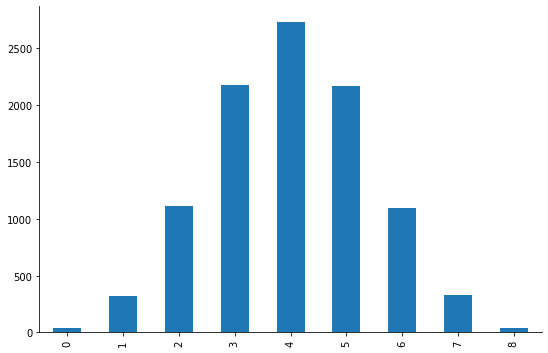

In [69]:
# Visualize the frequency distribution of flipping 8 coins

n_heads = simulation_rolls.n_heads
n_heads.sample(5)

# Group the results by the sample space and get the count for each outcome. 

n_heads.value_counts().sort_index().plot(kind='bar')

### 2-b. What is the probability of getting more than 3 heads?

In [74]:
(n_heads > 3).mean()

0.6356

In [73]:
boolean_more_3_heads = [((flips[i] == "Head").sum() > 3) for i in range(0, nrows)]
pd.Series(boolean_more_3_heads).mean()

0.6383

## 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

1. Experiment/Trial: randomly select two alumnis to put on two billboards
2. The probabily for each selection is NOT uniform, p = [3/4, 1/4]
3. Mapping [web development, data science] to [0, 1] and assuming the order doesn't matter, the possible outcomes of the experiment (sample space): [0, 1, 2], a discrete random varible. 
4. The probability distribution of the sample space is ?
3. The Event is to both are data science students, which represented by number 2

In [87]:
n_trials = nrows = 1_000_000
n_cohorts = ncols = 2


experiment = np.random.choice(a=[0,1], size=(nrows, ncols), p=[3/4,1/4])
experiment = pd.DataFrame(experiment)
experiment.sample(5)

experiment['n_ds'] = experiment.sum(axis=1)
experiment.sample(5)

n_ds = experiment.n_ds
(n_ds == 2).mean()

0.062782

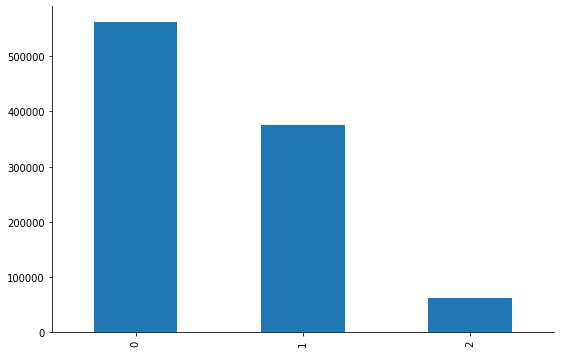

In [88]:
n_ds.value_counts().plot(kind='bar')

In [69]:
n_trials = nrows = 1_000_000
n_students = ncols = 2
billboards = np.random.choice(['web_development', 'data_science'], 
                              n_trials * n_students, 
                              p = [0.75, 0.25]).reshape(nrows, ncols)
billboards

array([['web_development', 'web_development'],
       ['data_science', 'web_development'],
       ['data_science', 'web_development'],
       ...,
       ['web_development', 'web_development'],
       ['web_development', 'web_development'],
       ['web_development', 'web_development']], dtype='<U15')

In [70]:
boolean = [(billboards[i][0] == 'data_science' and billboards[i][1] == 'data_science') for i in range(0, nrows)]
pd.Series(boolean).mean()

0.062568

## 4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

1. Experiment / Trial: buy poptart for 5 days, starting with 17 poptart packages.
2. The average packages of each purchase is 3 and the std is 1.5. Such info allow me to plot The probability density function for every purchase. 
3. The experiment is made up of 5 such perchanses, so the mean will be 3*5 and the std will be 1.5*5. 

<BarContainer object of 80 artists>

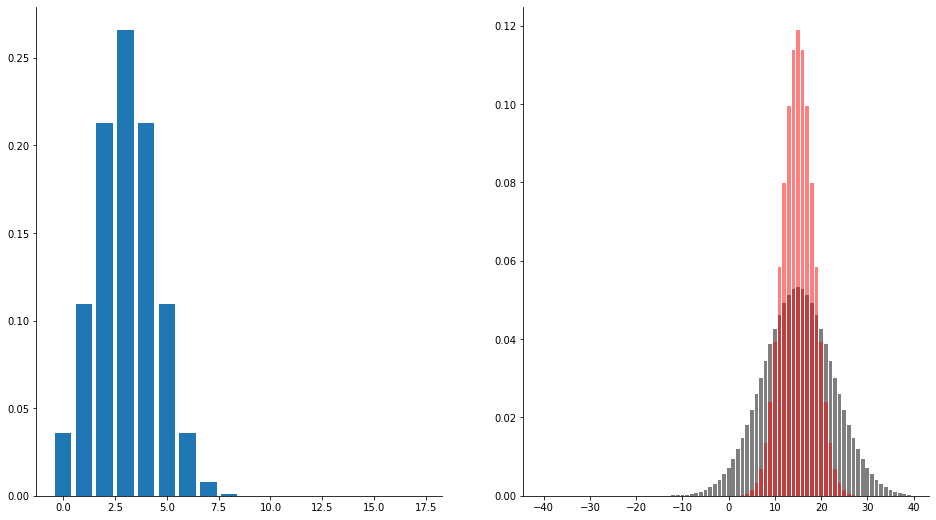

In [229]:
# Plot the probability density function

plt.subplot(1,2,1)
x = np.arange(start=0, stop=18)
y = stats.norm(loc=3.0, scale=1.5).pdf(x)
plt.bar(x,y)

# Hypothesis: Plot the probability density function of 5 purchases in a row (one trial)

plt.subplot(1,2,2)

x = np.arange(start=-40, stop=40)
y_transform = stats.norm(loc=15, scale=1.5*5).pdf(x)
y_combing = stats.norm(loc=15, scale=sqrt(1.5*1.5*5)).pdf(x)
plt.bar(x,y_transform,alpha=0.5,color='black')
plt.bar(x,y_combing,alpha=0.5,color='red')

# It is NOT transforming the random varibales. It is COMBINING. 

In [173]:
# Answer the question: What is the probability of:
# - more than 0 package left
# - at least 0 package left
# - consumed 16 or less

stats.norm(loc=15, scale=7.5).cdf(16)

0.553035116623614

In [239]:
stats.norm(loc=15, scale=sqrt(1.5*1.5*5)).cdf(16)

0.617202758002118

In [243]:
# Create the matrix for 1000 trials 

n_trials = nrows = 1_000_000
n_days = ncols = 5

poptarts = np.random.normal(loc=3, scale=1.5, size=(n_trials, n_days)).round()
poptarts

# convert the matrix to the DataFrame

poptarts = pd.DataFrame(poptarts)
poptarts.sample(5)

# simulate the Event: the purchase for 5 days

poptarts['purchased'] = poptarts.sum(axis=1)
poptarts.sample(5)

# Answer the question: any poptarts left?

purchased = poptarts['purchased']
(purchased < 17).mean()

0.67069

### Visulization

Text(0.5, 1.0, 'with data validation')

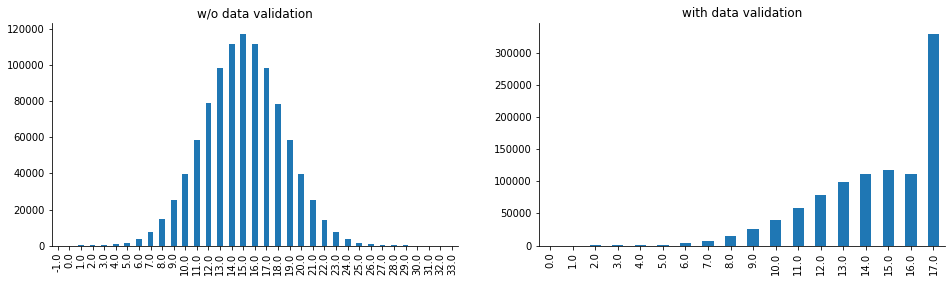

In [170]:
# To convert all the number larger than 17 to 17

purchased_valid = purchased.apply(lambda i: 17 if i > 17 else i)

# to convert all the number less than 0 to 0

purchased_valid = purchased_valid.apply(lambda i: 0 if i < 0 else i)


# Group the results

plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
purchased.value_counts().sort_index().plot(kind='bar')
plt.title('w/o data validation')

plt.subplot(2,2,2)
purchased_valid.value_counts().sort_index().plot(kind='bar')
plt.title('with data validation')

In [172]:
# Calculate the mean and std

purchased.agg(['mean', 'std'])

mean    15.002868
std      3.418359
Name: purchased, dtype: float64

## 5. Compare Heights: Men have an average height of 178 cm and standard deviation of 8cm; Women have a mean of 170, sd = 6cm; If a man and woman are chosen at random, P(woman taller than man)?

1. Experiment/Trial: randomly pick a men and a women in the population and compare their height.
2. There are three possible outcome: 
3. There are two random varibales: one is X(men) and the other is X(women). Both of them are continueous. 
4. 

<BarContainer object of 90 artists>

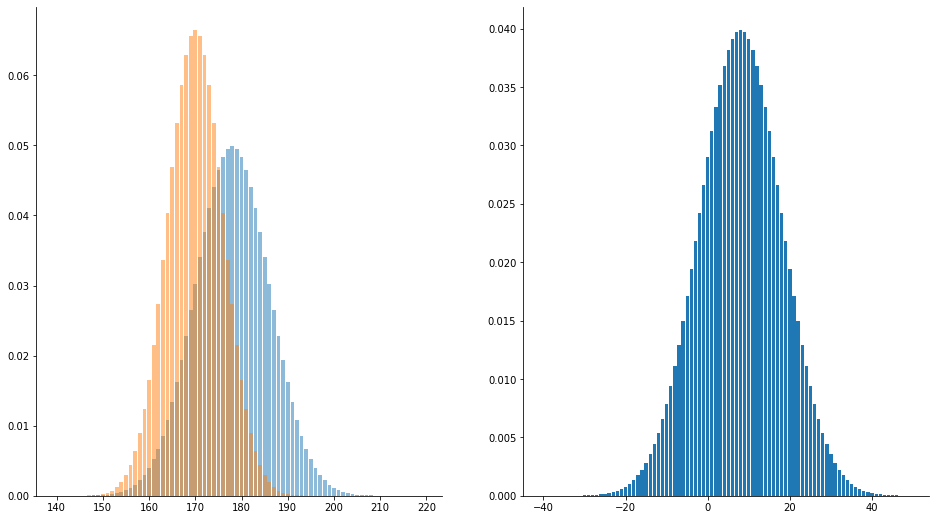

In [217]:
# Visualize the probability distribution for both men and women height

plt.subplot(1,2,1)

x = np.arange(start=140, stop=220)
men = stats.norm(loc=178, scale=8).pdf(x)
women = stats.norm(loc=170,scale=6).pdf(x)
plt.bar(x, men, alpha=0.5)
plt.bar(x, women, alpha=0.5)


# Combine the two random variables

plt.subplot(1,2,2)

from math import sqrt

mean_diff = 178 - 170
std_diff = sqrt(8**2 + 6**2)
x = np.arange(-40,50)
diff = stats.norm(mean_diff, std_diff).pdf(x)
plt.bar(x, diff)

In [218]:
stats.norm(mean_diff, std_diff).cdf(0)

0.2118553985833967

In [207]:
men = np.random.normal(178, 8, 1_000_000)
women = np.random.normal(170, 6, 1_000_000)
(men < women).mean()

0.212244

## 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. 

* sample space: [sucess, fail] <-> [1, 0]
* binomial random variable

<BarContainer object of 2 artists>

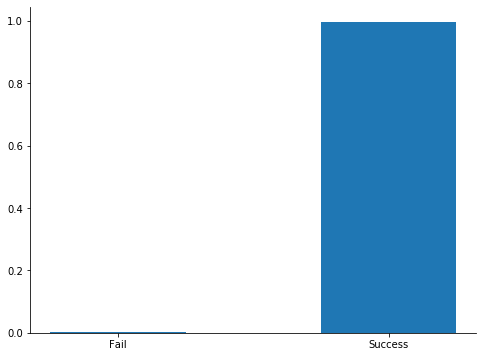

In [253]:
# Visualization

plt.figure(figsize=(8,6))

x = ['Fail','Success']
y = [1/250, 249/250]
plt.bar(x,y,width=0.5)

### a. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

1. Expriment / Trial: having 50 students download anaconda
2. 50 successes

In [254]:
stats.binom(50, 249/250).pmf(50)

0.8184024506760997

In [32]:
n_trials = nrows = 1_000_000
n_students = 50

installation_50 = np.random.choice(['Success','Fail'], (nrows, n_students), p = [249/250, 1/250])
pd.Series([ 'Fail' not in installation_50[i] for i in range(0, nrows)]).mean()

0.818775

In [255]:
stats.binom(100, 249/250).pmf(100)

0.669782571272646

In [33]:
n_trials = nrows = 1_000_000
n_students = 100

installation_50 = np.random.choice(['Success','Fail'], (nrows, n_students), p = [249/250, 1/250])
pd.Series([ 'Fail' not in installation_50[i] for i in range(0, nrows)]).mean()

0.669471

### b. What is the probability that we observe an installation issue within the first 150 students that download anaconda?

<BarContainer object of 11 artists>

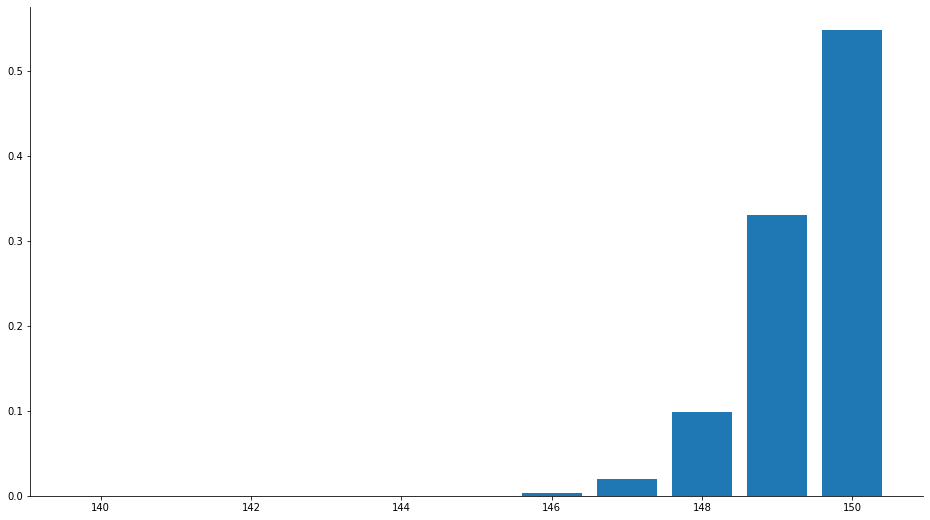

In [262]:
x = np.arange(start=140, stop=151)
y = stats.binom(150,249/250).pmf(x)
plt.bar(x,y)

In [264]:
1 - stats.binom(150, 249/250).pmf(150)

0.4518483022503271

In [34]:
n_trials = nrows = 1_000_000
n_students = 150

installation_50 = np.random.choice(['Success','Fail'], (nrows, n_students), p = [249/250, 1/250])
pd.Series([ 'Fail' in installation_50[i] for i in range(0, nrows)]).mean()

0.452348

### c. How likely is it that 450 students all download anaconda without an issue?

In [267]:
stats.binom(450, 249/250).pmf(450)

0.1647032961586129

In [35]:
n_trials = nrows = 1_000_000
n_students = 450

installation_450 = np.random.choice(['Success','Fail'], (nrows, n_students), p = [249/250, 1/250])
pd.Series([ 'Fail' not in installation_450[i] for i in range(0, nrows)]).mean()

0.164735

### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. 

* It is binomial random variable

### 7-a However, you haven't seen a food truck there in 3 days. How unlikely is this?

* Experiment/Trial: go to Travis Park three days to observe if there is a food truck

In [268]:
stats.binom(3,0.7).pmf(0)

0.027000000000000007

In [296]:
n_trials = nrows = 1_000_000
n_days = ncols = 3

food_truck = np.random.choice([1,0], (nrows, n_days), p=[0.7, 0.3])
food_truck = pd.DataFrame(food_truck)
food_truck.sample(5)

food_truck['show_up'] = food_truck.sum(axis=1)
food_truck.sample(5)

show_up = food_truck['show_up']
(show_up == 0).mean()

0.026879

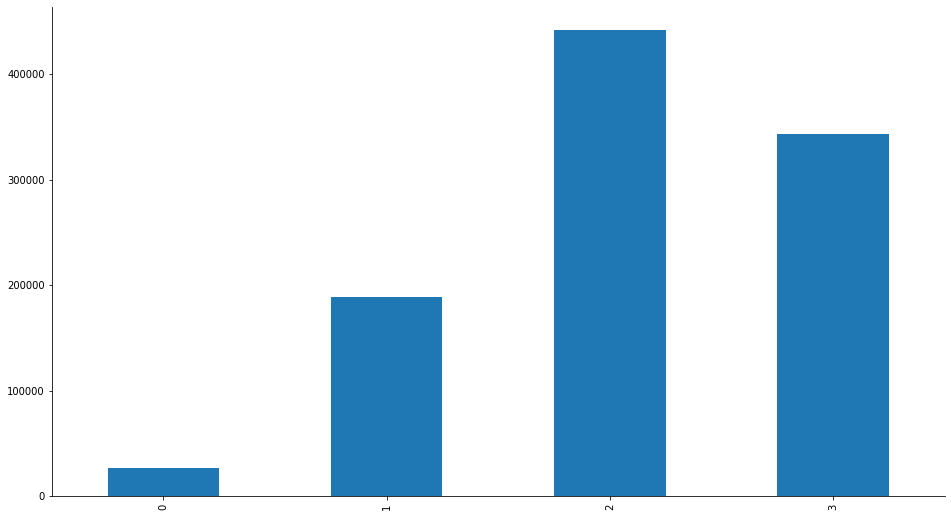

In [300]:
show_up.value_counts().sort_index().plot(kind='bar')

In [46]:
n_trials = nrows = 1_000_000
n_days = ncols = 3

no_food_truck = np.random.choice(['at_least_one','no_show'], (nrows, n_days), p=[0.7, 0.3])
no_food_truck

array([['no_show', 'at_least_one', 'at_least_one'],
       ['at_least_one', 'no_show', 'at_least_one'],
       ['at_least_one', 'at_least_one', 'no_show'],
       ...,
       ['at_least_one', 'no_show', 'no_show'],
       ['at_least_one', 'no_show', 'no_show'],
       ['no_show', 'no_show', 'at_least_one']], dtype='<U12')

In [49]:
pd.Series(['at_least_one' not in no_food_truck[i] for i in range(0, nrows)]).mean()

0.027206

### 7-b. How likely is it that a food truck will show up sometime this week?

In [269]:
1 - stats.binom(7, 0.7).pmf(0)

0.9997813

In [294]:
n_trials = nrows = 1_000_000
n_days = ncols = 7

food_truck = np.random.choice([1,0], (nrows, n_days), p=[0.7, 0.3])
food_truck = pd.DataFrame(food_truck)
food_truck.sample(5)

food_truck['show_up'] = food_truck.sum(axis=1)
food_truck.sample(5)

show_up = food_truck['show_up']
(show_up > 0).mean()

0.999788

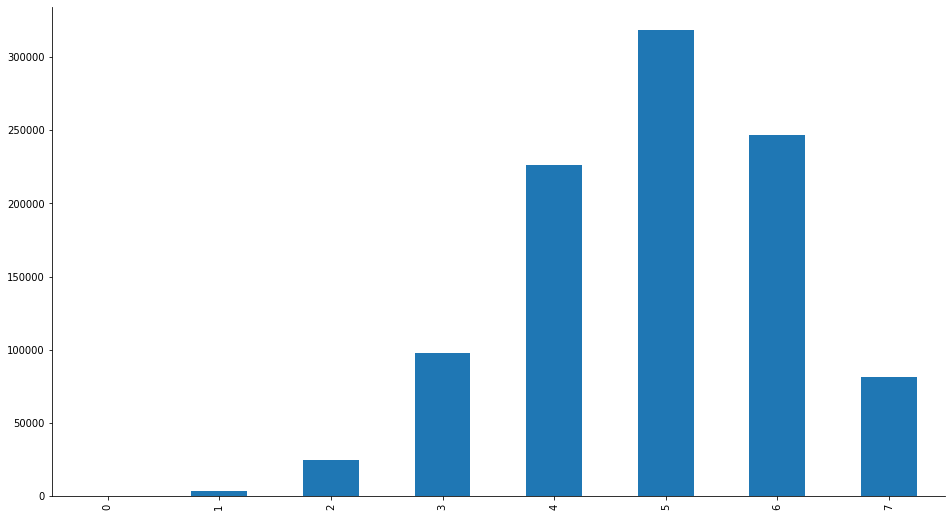

In [295]:
# Visualization

show_up.value_counts().sort_index().plot(kind='bar')

In [285]:
n_trials = nrows = 1_000_000
n_days = ncols = 7

food_truck = np.random.choice(['at_least_one','no_show'], (nrows, n_days), p=[0.7, 0.3])
food_truck

array([['no_show', 'at_least_one', 'no_show', ..., 'at_least_one',
        'at_least_one', 'at_least_one'],
       ['no_show', 'at_least_one', 'at_least_one', ..., 'at_least_one',
        'no_show', 'no_show'],
       ['no_show', 'at_least_one', 'at_least_one', ..., 'no_show',
        'at_least_one', 'no_show'],
       ...,
       ['at_least_one', 'at_least_one', 'at_least_one', ...,
        'at_least_one', 'at_least_one', 'at_least_one'],
       ['at_least_one', 'no_show', 'at_least_one', ..., 'at_least_one',
        'at_least_one', 'at_least_one'],
       ['at_least_one', 'no_show', 'no_show', ..., 'no_show',
        'at_least_one', 'at_least_one']], dtype='<U12')

In [286]:
pd.Series(['at_least_one' in food_truck[i] for i in range(0, nrows)]).mean()

0.999781

### 8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

* flipping coin? No, this is not about success or fail, or head or tail.

In [107]:
n_trials = nrows = 10_000
n_people = ncols = 23

n_birthdays = np.random.choice(range(1,357), (nrows, ncols))
n_birthdays

array([[143,  81, 131, ..., 290, 226, 139],
       [335, 245, 180, ..., 232, 184,  87],
       [209, 194,  41, ..., 268, 253, 196],
       ...,
       [178, 265, 157, ..., 308, 163, 169],
       [ 33,  95, 195, ..., 310, 276, 160],
       [163, 254,  76, ...,  60, 331, 196]])

In [108]:
n_birthdays = pd.DataFrame(n_birthdays)
pd.Series([n_birthdays.iloc[i].duplicated().any() for i in n_birthdays.index]).mean()

0.5105

In [109]:
n_trials = nrows = 10_000
n_people = ncols = 20

n_birthdays = np.random.choice(range(1,357), (nrows, ncols))
n_birthdays

array([[356, 111, 109, ..., 344, 111, 264],
       [148, 116, 202, ..., 226, 251,  26],
       [196, 119,  11, ..., 143, 110, 341],
       ...,
       [265, 218,  89, ...,  46, 158, 309],
       [163, 145, 103, ..., 293, 273, 122],
       [ 83, 318, 323, ...,  83, 146, 287]])

In [123]:
n_birthdays = pd.DataFrame(n_birthdays)
pd.Series([n_birthdays.iloc[i].duplicated().any() for i in n_birthdays.index]).mean()

0.4208

In [137]:
n_trials = nrows = 100_000
n_people = ncols = 40

n_birthdays = np.random.choice(range(1,357), (nrows, ncols))

n_birthdays = pd.DataFrame(n_birthdays)
pd.Series([n_birthdays.iloc[i].duplicated().any() for i in n_birthdays.index]).mean()

0.89707